In [ ]:
# Importing libraries
import pandas as pd

In [ ]:
# Reading Netflix Userbase.csv file
user_data = pd.read_csv('Netflix Userbase.csv')
user_data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
# To list all the column names in the dataset
user_data.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [ ]:
# Reading All_viewingActivity.csv file
views_df = pd.read_csv('All_ViewingActivity.csv')
views_df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,User 1,2022-04-28 16:08:56,00:00:06,NaN,Chernobyl 1986,NaN,Device Type 1,01:02:16,01:02:16,IN (India)
1,User 1,2022-04-28 15:54:30,00:09:39,NaN,13 Hours: The Secret Soldiers of Benghazi,NaN,Device Type 1,02:13:19,02:13:19,IN (India)
2,User 1,2022-04-28 15:53:20,00:00:06,NaN,Saving Private Ryan,NaN,Device Type 1,01:16:17,01:16:17,IN (India)
3,User 1,2022-04-28 15:52:18,00:00:15,NaN,Mosul,NaN,Device Type 1,01:06:44,01:06:44,IN (India)
4,User 1,2022-04-28 15:49:11,00:01:45,NaN,12 Strong,NaN,Device Type 1,00:52:28,00:52:28,IN (India)


In [ ]:
# Listing the column name
views_df.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')

In [ ]:
# Reading netflix_titles.csv file
titles_df = pd.read_csv('netflix_titles.csv')
# Keep only title and genre columns
titles_df = titles_df[['title', 'listed_in']]
titles_df.rename(columns={'listed_in': 'genre'}, inplace=True)
titles_df.head()

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries"
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act..."
3,Jailbirds New Orleans,"Docuseries, Reality TV"
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
# Standardize for matching
titles_df['title_clean'] = titles_df['title'].str.lower().str.strip()
views_df['title_clean'] = views_df['Title'].str.lower().str.strip()

# Merge on cleaned title
merged_df = pd.merge(views_df, titles_df[['title_clean', 'genre']], on='title_clean', how='left')

merged_df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,title_clean,genre
0,User 1,2022-04-28 16:08:56,00:00:06,NaN,Chernobyl 1986,NaN,Device Type 1,01:02:16,01:02:16,IN (India),chernobyl 1986,NaN
1,User 1,2022-04-28 15:54:30,00:09:39,NaN,13 Hours: The Secret Soldiers of Benghazi,NaN,Device Type 1,02:13:19,02:13:19,IN (India),13 hours: the secret soldiers of benghazi,NaN
2,User 1,2022-04-28 15:53:20,00:00:06,NaN,Saving Private Ryan,NaN,Device Type 1,01:16:17,01:16:17,IN (India),saving private ryan,NaN
3,User 1,2022-04-28 15:52:18,00:00:15,NaN,Mosul,NaN,Device Type 1,01:06:44,01:06:44,IN (India),mosul,"Action & Adventure, Dramas, International Movies"
4,User 1,2022-04-28 15:49:11,00:01:45,NaN,12 Strong,NaN,Device Type 1,00:52:28,00:52:28,IN (India),12 strong,NaN


In [ ]:
# To list the merged_df column names
merged_df.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country', 'title_clean', 'genre'],
      dtype='object')

In [ ]:
# Considering only required columns
merged_df_filtered = merged_df[['Profile Name', 'Start Time', 'Duration', 'Title', 'genre']]
merged_df_filtered.head()

,Profile Name,Start Time,Duration,Title,genre
0,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,NaN
1,User 1,2022-04-28 15:54:30,00:09:39,13 Hours: The Secret Soldiers of Benghazi,NaN
2,User 1,2022-04-28 15:53:20,00:00:06,Saving Private Ryan,NaN
3,User 1,2022-04-28 15:52:18,00:00:15,Mosul,"Action & Adventure, Dramas, International Movies"
4,User 1,2022-04-28 15:49:11,00:01:45,12 Strong,NaN


In [ ]:
merged_df_filtered.isnull().sum()

,0
Profile Name,0
Start Time,0
Duration,0
Title,0
genre,9391


In [ ]:
# To fill Unknown in null place
import warnings
warnings.filterwarnings('ignore')
merged_df_filtered['genre'].fillna('Unknown', inplace=True)
merged_df_filtered.head()

,Profile Name,Start Time,Duration,Title,genre
0,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Unknown
1,User 1,2022-04-28 15:54:30,00:09:39,13 Hours: The Secret Soldiers of Benghazi,Unknown
2,User 1,2022-04-28 15:53:20,00:00:06,Saving Private Ryan,Unknown
3,User 1,2022-04-28 15:52:18,00:00:15,Mosul,"Action & Adventure, Dramas, International Movies"
4,User 1,2022-04-28 15:49:11,00:01:45,12 Strong,Unknown


In [ ]:
merged_df_filtered.isnull().sum()

,0
Profile Name,0
Start Time,0
Duration,0
Title,0
genre,0


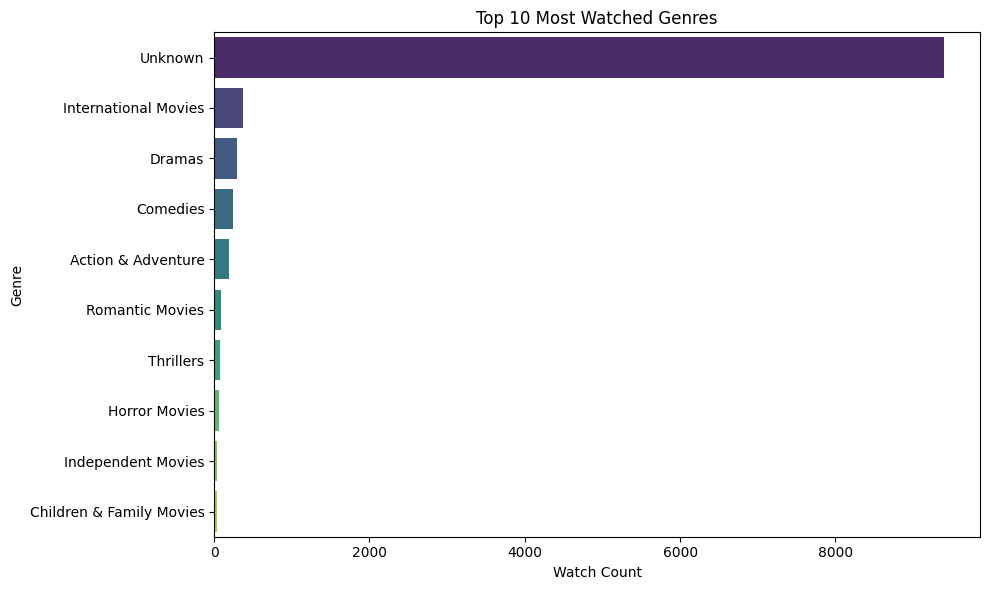

In [ ]:
# 1. Analyze Top Genres
# Count how many times each genre appears (i.e., was watched):

import matplotlib.pyplot as plt
import seaborn as sns

df = merged_df_filtered.copy()
df['genre'] = df['genre'].fillna('Unknown')
df['genre'] = df['genre'].str.split(', ')
df = df.explode('genre')

# Count top genres
top_genres = df['genre'].value_counts().head(10)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Watched Genres')
plt.xlabel('Watch Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('top_genres.png')
plt.show()

📊 Conclusion: Top 10 Most Watched Genres
This horizontal bar chart presents the top 10 most-watched movie genres, based on watch count data.

🧠 Key Observations:
Dominance of ‘Unknown’ Category:

The Unknown genre overwhelmingly dominates the chart with over 9,000 views, far exceeding any other category.

Most Popular Known Genre:

Among labeled genres, International Movies lead, followed by:

Dramas

Comedies

Action & Adventure

Least Watched Genres:

Genres like Children & Family Movies, Independent Movies, and Horror Movies show the lowest viewership within the top 10.

These may have niche audiences or limited availability.

Relatively Balanced Interest:

Aside from the Unknown spike, most other genres are fairly evenly distributed, each having modest but meaningful viewership.

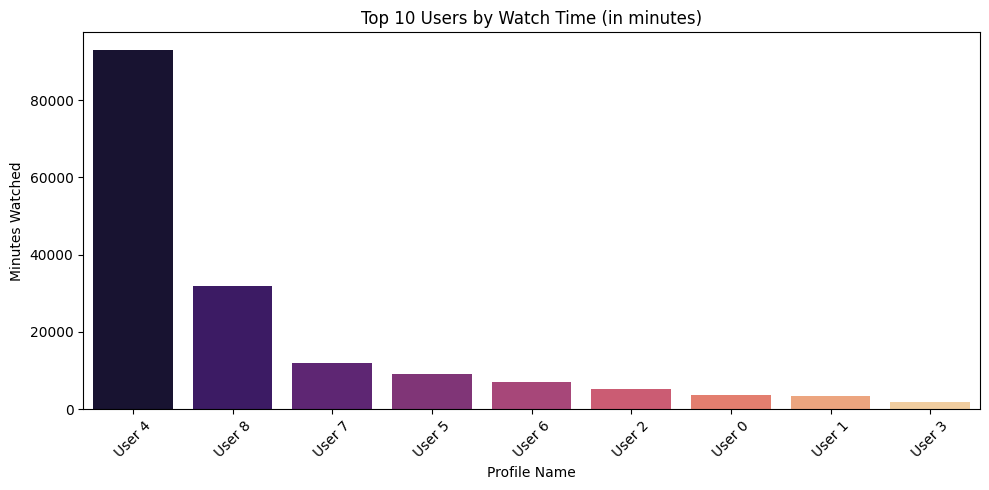

In [ ]:
#  2. Watch Hours Per User
# Convert Duration to minutes, then sum per user:
import pandas as pd

# Convert Duration from HH:MM:SS to minutes
df['Duration_Min'] = pd.to_timedelta(df['Duration']).dt.total_seconds() / 60

# Sum duration per Profile
watch_hours_per_user = df.groupby('Profile Name')['Duration_Min'].sum().sort_values(ascending=False)

# Plot top 10 users
plt.figure(figsize=(10, 5))
sns.barplot(x=watch_hours_per_user.head(10).index, y=watch_hours_per_user.head(10).values, palette='magma')
plt.xticks(rotation=45)
plt.title('Top 10 Users by Watch Time (in minutes)')
plt.ylabel('Minutes Watched')
plt.xlabel('Profile Name')
plt.tight_layout()
plt.savefig('watch_hours_per_user.png')
plt.show()


📊 Conclusion: Top 10 Users by Watch Time (in Minutes)
This bar chart illustrates the top 10 users based on the total watch time (in minutes), providing insight into user engagement levels on a streaming platform.

🧠 Key Observations:
Super-Engaged Viewer (User 4):

User 4 is by far the most engaged, with nearly 95,000 minutes watched.

This is three times more than the second-ranked user and over 20x more than several others in the top 10.

Indicates a highly active or potentially binge-watching user profile.

Top 3 Users Dominate:

User 8 and User 7 also show significant watch time, though much less than User 4.

Together, the top 3 users account for a majority of the total watch time among the top 10.

Long Tail Distribution:

The remaining users (User 5 to User 3) have relatively lower but consistent engagement, ranging between ~2,000 to 12,000 minutes.

Indicates casual or moderate users forming the platform’s base.

Clear Drop-off Trend:

There’s a steep decline from the top 3 users to the rest, suggesting a small group of highly active users disproportionately contributes to total platform usage.

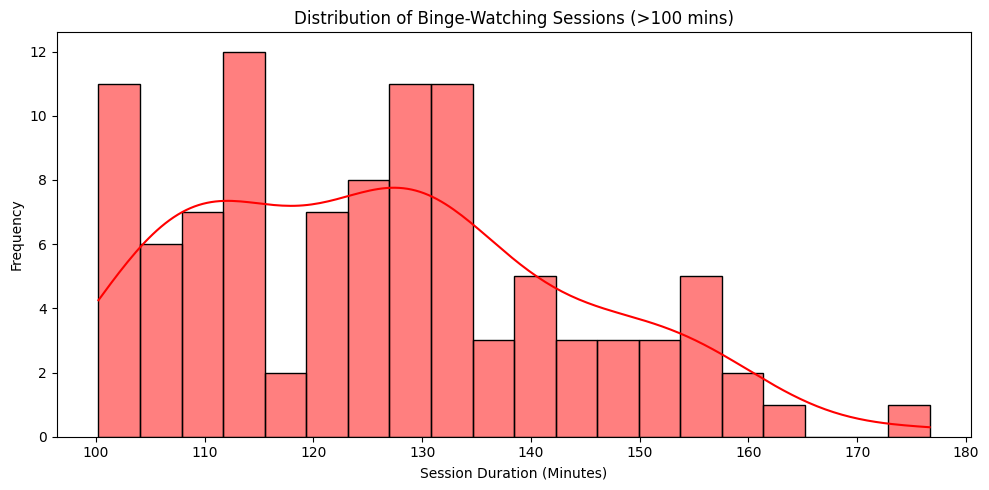

In [ ]:
#  3. Visualize Binge Behavior
# Binge-watching can be inferred by long duration sessions. You can identify users who watch for >100 minutes in a single session.

binge_df = df[df['Duration_Min'] > 100]

plt.figure(figsize=(10, 5))
sns.histplot(binge_df['Duration_Min'], bins=20, kde=True, color='red')
plt.title('Distribution of Binge-Watching Sessions (>100 mins)')
plt.xlabel('Session Duration (Minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('binge_behavior.png')
plt.show()


✅ Conclusion:
Most binge-watching sessions last between 110 and 130 minutes, suggesting this is the typical attention span or preferred session length for extended viewing. Longer sessions (beyond 150–160 mins) are less frequent, indicating user fatigue or time constraints.

In [ ]:
# 1: Create a Synthetic Ratings Dataset
# We'll create random ratings (between 4 and 10) for each unique Title in your df.a

import pandas as pd
import numpy as np

# Assuming your main DataFrame is named 'df' and has a 'Title' column
unique_titles = df['Title'].unique()

# Generate random ratings between 4.0 and 10.0
synthetic_ratings = pd.DataFrame({
    'Title': unique_titles,
    'Rating': np.round(np.random.uniform(4.0, 10.0, size=len(unique_titles)), 1)
})
synthetic_ratings.head()

,Title,Rating
0,Chernobyl 1986,5.2
1,13 Hours: The Secret Soldiers of Benghazi,7.6
2,Saving Private Ryan,9.4
3,Mosul,7.9
4,12 Strong,7.0


In [ ]:
# 2: Merge Ratings into Your Data

df_with_ratings = pd.merge(df, synthetic_ratings, on='Title', how='left')
df_with_ratings.head()

,Profile Name,Start Time,Duration,Title,genre,Duration_Min,Rating
0,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Unknown,0.10,5.2
1,User 1,2022-04-28 15:54:30,00:09:39,13 Hours: The Secret Soldiers of Benghazi,Unknown,9.65,7.6
2,User 1,2022-04-28 15:53:20,00:00:06,Saving Private Ryan,Unknown,0.10,9.4
3,User 1,2022-04-28 15:52:18,00:00:15,Mosul,Action & Adventure,0.25,7.9
4,User 1,2022-04-28 15:52:18,00:00:15,Mosul,Dramas,0.25,7.9


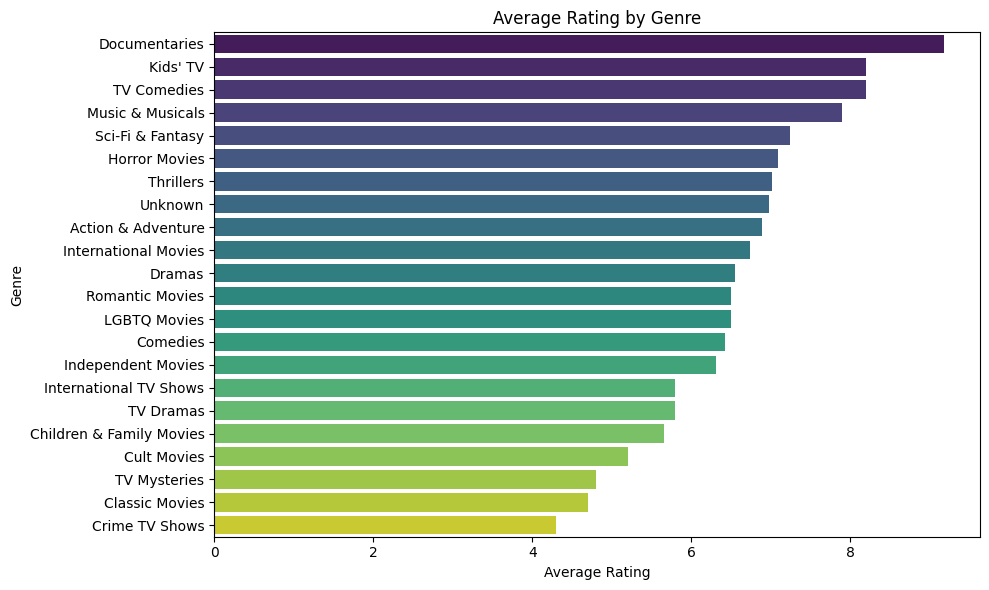

In [ ]:
# Analyze and Visualize Ratings vs. Genres

import matplotlib.pyplot as plt
import seaborn as sns

# Fill missing genres (if any) and split multiple genres
df_with_ratings['genre'] = df_with_ratings['genre'].fillna('Unknown')
df_with_ratings['genre'] = df_with_ratings['genre'].str.split(', ')
df_exploded = df_with_ratings.explode('genre')

# Calculate average rating per genre
genre_rating_avg = df_exploded.groupby('genre')['Rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_rating_avg.values, y=genre_rating_avg.index, palette='viridis')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('ratings_vs_genres.png')
plt.show()


📊 Graph Description: Average Rating by Genre
🔍 What It Shows:
This horizontal bar chart displays the average user ratings across different movie and TV genres.

📈 Key Elements:
Y-axis (Genre): Categories like Documentaries, Kids’ TV, Dramas, Sci-Fi, etc.

X-axis (Average Rating): Numerical average of viewer ratings (possibly on a 0–10 scale)

Bars: Represent how well each genre is rated on average

Color Gradient: Likely based on rating values (darker = higher rating)

🧠 Insights:
🏆 Top-Rated Genres:
Documentaries top the list with the highest average rating

Kids’ TV, TV Comedies, and Music & Musicals also receive high viewer satisfaction

😐 Mid-Ranked Genres:
Action & Adventure, International Movies, and Dramas sit around the middle

These genres are commonly liked but have more variable content quality

🔻 Lowest-Rated Genres:
Classic Movies, Crime TV Shows, TV Mysteries, and Cult Movies received lower average ratings

May indicate niche or outdated content appeal

✅ Conclusion:
Users favor informative and family-friendly genres like Documentaries and Kids' TV, while traditional or niche categories like Crime TV Shows and Classic Movies are rated lower.
This data can help streaming platforms tailor recommendations and marketing strategies based on genre preference.